In [1]:
!pip install pykrx
!pip install yfinance
!pip install pandas-datareader
!pip install finance-datareader

     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 256kB 28.3MB/s 
     |████████████████████████████████| 6.3MB 32.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=4fcdbc52fca3f1896c3a6366544654a947751b69de10b74844dafab851cd974f
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import FinanceDataReader as fdr
from pykrx import stock

import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')



## def 차트

In [5]:
from google.colab import files 
files.upload()

Saving malgun.ttf to malgun.ttf


In [6]:

import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (14,4)
mpl.rcParams['axes.grid'] = True 
path = '/content/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
    if nrows > 0:
        print(df.head(nrows))
    else:
        print(df.tail(nrows))
    
    if labels:
        cols = df.columns
        for i, col in enumerate(cols):
            df[col].plot(label=labels[i], kind=kind)
    else :
        df.plot(kind=kind)
    
    plt.title(title)
    plt.legend()
    plt.show()


def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
    ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    if nrows1 > 0:
        print(df1.head(nrows1))
    elif nrows1 < 0:
        print(df1.tail(nrows1))
    if nrows2 > 0:
        print(df2.head(nrows2))
    else:
        print(df2.tail(nrows2))
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax2=ax1.twinx()
    if kind1 == 'line':
        df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
        df2.plot(kind=kind2, ax=ax1)  #bar
    else:
        df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
        df2.plot(kind=kind2, ax=ax2) #color='y',
        
    # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    # ax1.set_xticklabels(df['date'])    
    ax1.yaxis.tick_right()
    ax2.yaxis.tick_left()
    ax1.set_ylabel(y1) #, color='red')
    ax2.set_ylabel(y2) #, color='red')
    ax1.legend(loc=1)
    ax2.legend(loc=2)
    plt.title(title)
    ax1.grid(False)
    plt.show()



Malgun Gothic


# 주가 index

## 주가데이터 불러오기

In [ ]:
#삼성전자 1996-11-05~현재
ss = fdr.DataReader('005930', '2021-05-01')

#LG 전자(066570)
lg = fdr.DataReader('066570', '2021-05-01')

#apple(APPL), 2017-01-01~현재
ap = fdr.DataReader('AAPL', '2021-05-01')



In [ ]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265 entries, 2020-05-04 to 2021-05-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    265 non-null    int64  
 1   High    265 non-null    int64  
 2   Low     265 non-null    int64  
 3   Close   265 non-null    int64  
 4   Volume  265 non-null    int64  
 5   Change  265 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 14.5 KB


In [ ]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2020-05-01 to 2021-05-26
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   270 non-null    float64
 1   Open    270 non-null    float64
 2   High    270 non-null    float64
 3   Low     270 non-null    float64
 4   Volume  270 non-null    float64
 5   Change  270 non-null    float64
dtypes: float64(6)
memory usage: 14.8 KB


In [ ]:
lg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2021-05-03 to 2021-05-27
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    17 non-null     int64  
 1   High    17 non-null     int64  
 2   Low     17 non-null     int64  
 3   Close   17 non-null     int64  
 4   Volume  17 non-null     int64  
 5   Change  17 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 952.0 bytes


In [ ]:
print(ss.shape, lg.shape, ap.shape)

(17, 6) (17, 6) (18, 6)


In [ ]:
ss.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-05-03,81000,82400,81000,81700,15710336,0.002454
2021-05-04,81900,82600,81800,82600,12532550,0.011016
2021-05-06,81700,82300,81700,82300,17047511,-0.003632
2021-05-07,81800,82100,81500,81900,14154882,-0.004860
2021-05-10,82300,83500,81800,83200,19385027,0.015873


In [ ]:
df  = pd.concat([ss['Close'],lg['Close'],ap['Close']], axis=1, keys= ['ss','lg','ap'])

In [ ]:
df.head()

,ss,lg,ap
Date,,,
2021-05-03,81700.0,155000.0,132.54
2021-05-04,82600.0,154500.0,127.85
2021-05-05,NaN,NaN,128.10
2021-05-06,82300.0,151500.0,129.74
2021-05-07,81900.0,153000.0,130.21


##  변동률 계산

In [ ]:
df['ssv'] = df['ss'].pct_change(periods= 1) *100
df['apv'] = df['ap'].pct_change(periods= 1) *100
df['lgv'] = df['lg'].pct_change(periods= 1) *100
df = df.fillna(0)
df.head()

,ss,lg,ap,ssv,apv,lgv
Date,,,,,,
2021-05-03,81700.0,155000.0,132.54,0.000000,0.000000,0.000000
2021-05-04,82600.0,154500.0,127.85,1.101591,-3.538554,-0.322581
2021-05-05,0.0,0.0,128.10,0.000000,0.195542,0.000000
2021-05-06,82300.0,151500.0,129.74,-0.363196,1.280250,-1.941748
2021-05-07,81900.0,153000.0,130.21,-0.486027,0.362263,0.990099


                 ssv       lgv       apv
Date                                    
2021-05-03  0.000000  0.000000  0.000000
2021-05-04  1.101591 -0.322581 -3.538554
2021-05-05  1.101591 -0.322581 -3.343013
2021-05-06  0.738395 -2.264328 -2.062763
2021-05-07  0.252368 -1.274229 -1.700500


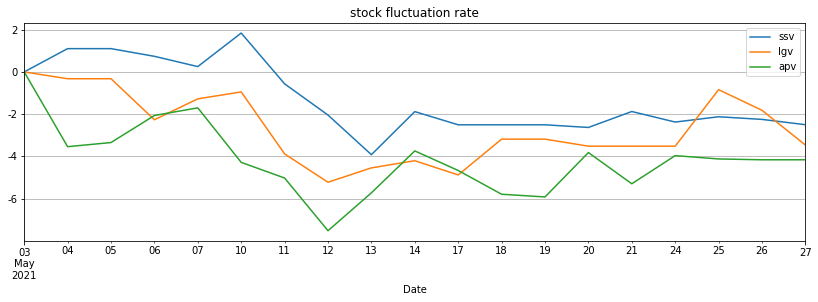

In [ ]:
myplot(df[['ssv','lgv','apv']].cumsum(), kind = 'line', title='stock fluctuation rate')

                 ssv       lgv       apv
Date                                    
2021-05-03  0.000000  0.000000  0.000000
2021-05-04  1.101591 -0.322581 -3.538554
2021-05-05  0.000000  0.000000  0.195542
2021-05-06 -0.363196 -1.941748  1.280250
2021-05-07 -0.486027  0.990099  0.362263


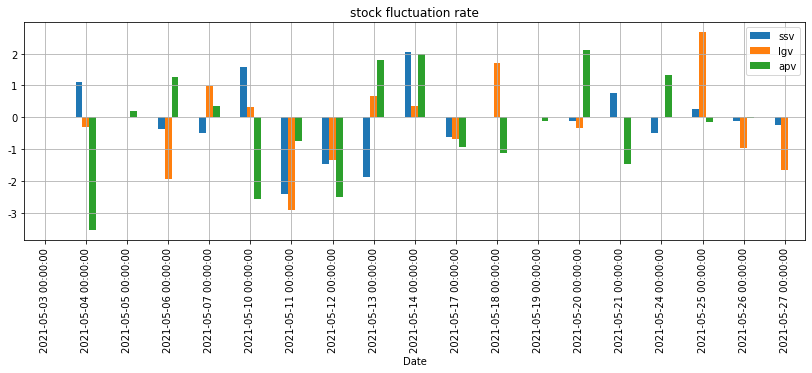

In [ ]:
myplot(df[[ 'ssv', 'lgv', 'apv']], kind='bar', title='stock fluctuation rate')

In [ ]:
df.to_csv('sample.csv')

## 가격지수
 * 가격지수 : 당일주가(시가총액) / 기준일 주가(시가총액) *100
 *  시가총액 : 주가 * 발행량 * 유동비율
 (유동 비율: 유동자산/유동부채 <br>
유동 자산 : 회사가 1년 안에 현금으로 바꿀 수 있는 자산
유동 부채 : 1년 안에 갚아야 할 부채)
* 가격변동률 : (당일주가-기준일 주가)/ 기준일 주가 * 100


In [ ]:
!pip install bokeh

In [ ]:
!pip install mplfinance as mpf

In [ ]:
df = fdr.DataReader('005930'. '2021-01-01', '2021-02-15')

# 차트 설정
config = {'title':' 삼성전자', 
          'width': 600, 
          'height': 600,
          'volume': True,
}

fdr.chart.config(config=config)
fdr.chart.plot(ss)


In [ ]:
kwargs = 

# 선물

In [72]:
df = pd.read_excel('WTI선물.xlsx', sheet_name= 'M',index_col ='Date')
edf = pd.read_excel('WTI선물.xlsx', sheet_name= 'EXP', index_col = 'Month', parse_dates=['Month', 'Last Trade'])

In [45]:
df.info()
#  spot :현물가격
#  front : 최근월물 가격(가장가까운 만기시점)
#  second : 차근월물가격(최근월 다음 만기시점)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2017-12-28 to 2010-01-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Spot    2014 non-null   float64
 1   Front   2014 non-null   float64
 2   Second  2014 non-null   float64
dtypes: float64(3)
memory usage: 62.9 KB


In [46]:
edf.info()
# Last Trade 최종거래일
# Month 만기일

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 293 entries, 2000-02-01 to 2017-12-26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      293 non-null    object        
 1   Last Trade  293 non-null    datetime64[ns]
 2   Last Price  223 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.2+ KB


In [16]:
df.head()

,Spot,Front,Second
Date,,,
2017-12-28,59.84,59.84,59.87
2017-12-27,59.64,59.64,59.69
2017-12-26,59.97,59.97,60.00
2017-12-22,58.42,58.47,58.54
2017-12-21,58.33,58.36,58.40


In [42]:
edf.head()

,Ticker,Month,Last Price
Last Trade,,,
2000-01-20,CLG00,2000-02-01,29.66
2000-02-22,CLH00,2000-03-01,29.62
2000-03-21,CLJ00,2000-04-01,28.00
2000-04-19,CLK00,2000-05-01,27.35
2000-05-22,CLM00,2000-06-01,28.61


In [47]:
print(edf.index.max(), edf.index.min())
print(df.index.max(), df.index.min())

2017-12-26 00:00:00 2000-02-01 00:00:00
2017-12-28 00:00:00 2010-01-04 00:00:00


In [64]:
edf.loc['2010-01-04':].tail()

,Ticker,Last Trade,Last Price
Month,,,
2017-12-24,CLZ4,2024-11-20,NaN
2017-06-25,CLM5,2025-05-20,NaN
2017-12-25,CLZ5,2025-11-20,NaN
2017-06-26,CLM6,2026-05-19,NaN
2017-12-26,CLZ6,2026-11-20,NaN


In [76]:
edf.index

DatetimeIndex(['2000-02-01', '2000-03-01', '2000-04-01', '2000-05-01',
               '2000-06-01', '2000-07-01', '2000-08-01', '2000-09-01',
               '2000-10-01', '2000-11-01',
               ...
               '2017-09-23', '2017-10-23', '2017-11-23', '2017-12-23',
               '2017-06-24', '2017-12-24', '2017-06-25', '2017-12-25',
               '2017-06-26', '2017-12-26'],
              dtype='datetime64[ns]', name='Month', length=293, freq=None)

In [ ]:
edf.index


In [78]:
df.head()

,Spot,Front,Second,exp
Date,,,,
2017-12-28,59.84,59.84,59.87,NaN
2017-12-27,59.64,59.64,59.69,NaN
2017-12-26,59.97,59.97,60.00,1.0
2017-12-22,58.42,58.47,58.54,1.0
2017-12-21,58.33,58.36,58.40,1.0


In [88]:
gdf = pd.concat([df,edf.loc['2010-01-04':]],axis=1, join ='outer')
gdf.dropna()

,Spot,Front,Second,exp,Ticker,Last Trade,Last Price
2017-01-03,52.33,52.33,53.29,1.0,CLF03,2002-12-19,30.56
2017-01-04,53.26,53.26,54.22,1.0,CLF04,2003-12-19,33.02
2017-01-05,53.76,53.76,54.68,1.0,CLF05,2004-12-20,45.64
2017-01-06,53.99,53.99,54.87,1.0,CLF06,2005-12-20,57.98
2017-01-09,51.96,51.96,52.87,1.0,CLF09,2008-12-19,33.87
...,...,...,...,...,...,...,...
2017-12-13,56.60,56.60,56.59,1.0,CLZ13,2013-11-20,93.33
2017-12-14,57.04,57.04,57.08,1.0,CLZ14,2014-11-20,75.58
2017-12-15,57.30,57.30,57.33,1.0,CLZ15,2015-11-20,40.39
2017-12-18,57.16,57.16,57.22,1.0,CLZ8,2018-11-19,54.72


In [79]:
df['exp'] = np.nan
cnt = 0
for d in df.index:
  if d in edf.index:
    df.loc[d]['exp'] = 1
df = df[df['exp'] == 1]


## 선물가
- 만기일에는 롤오버가 발생 
- 롤오버비용 : 차근월(Second) 만기금액- 최근월(front) 만기금액

Text(0.5, 1.0, 'rollover 증감')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


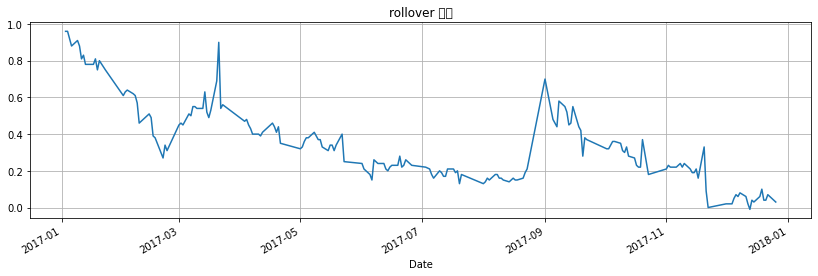

In [89]:
pd.Series(df['Second'] - df['Front']).plot()
plt.title("rollover 증감")

In [84]:
rollover_cost = np.array((df['Second'] - df['Front'])).sum()
df.loc[df.index.max()]['Spot']- df.loc[df.index.min()]['Spot']-rollover_cost

-58.50000000000003

## 선물 이론가 산출
- 이론가 = 선물가격 * exp((r-d)t) <br>
r:이자율,d:배당금율, t: 남은일수/252

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=tangbaboda&logNo=221567431380

In [10]:
## 선물이론가_by한결
def 이론가(선물지수, 이자율, 배당률, 오늘, 만기일):
    list=[]
#     잔존만기일 = np.busday_count(오늘, 만기일) / 252
    만기디데이 = np.busday_count(오늘, 만기일)
    for i in range(만기디데이,0,-1):
        잔존일수 = i/252
        선물이론가 = 선물지수 * np.exp((이자율-배당률) * 잔존일수)
        list.append(선물이론가.values[만기디데이-i])
        df = pd.DataFrame(data=list)
    return df

In [ ]:
def 이론가(선물지수,r,d,start_date, expire_date):
  잔존만기일= np.busday_count(start_date,expire_date)/252  
  선물이론가 = 선물지수 * np.exp((r-d)*잔존만기일)
  return 선물이론가


In [11]:
temp = pd.DataFrame({
                    'date':pd.date_range('2021-01-04',periods=4),
                   'a': [100,101,102,103]   ,
                   'b':[1,1,1,1]
                })

# temp['date']  = pd.to_datetime(temp['date'] , format='%Y-%m-%d', errors='raise')
temp = temp.set_index('date')
print(temp.info())
print(temp.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2021-01-04 to 2021-01-07
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       4 non-null      int64
 1   b       4 non-null      int64
dtypes: int64(2)
memory usage: 96.0 bytes
None
              a  b
date              
2021-01-04  100  1
2021-01-05  101  1
2021-01-06  102  1
2021-01-07  103  1


In [12]:
temp

,a,b
date,,
2021-01-04,100,1
2021-01-05,101,1
2021-01-06,102,1
2021-01-07,103,1


In [ ]:
r = 0.0225
d = 0.015
개시일 = temp.index[-1]
start_date = '2021-03-31'
선물지수 = temp['a']
개시일 = temp['date']

for n in temp.index:
  expire_date = n
  S= temp.loc[n,'a']
  F = 이론가(S, r,d,start_date,n)
  f = '{:,2f}'.format(F)
  temp.loc[n,'이론가'] = f

ValueError: ignored

In [ ]:
np.busday_count('2021-01-04','2021-03-31')

62

In [ ]:
103*np.exp((r-d)*62/252)

103.19023498425189